# ANN for Iris Datset

### Step 1: Get the data

Link: [Iris Dataset](https://www.kaggle.com/uciml/iris)

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sn

RAND_SEED = 492

In [2]:
df = pd.read_csv('./datasets/Iris.csv')
del df['Id']
le = LabelEncoder()
df.Species = le.fit_transform(df.Species)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Step 2: Plot the data

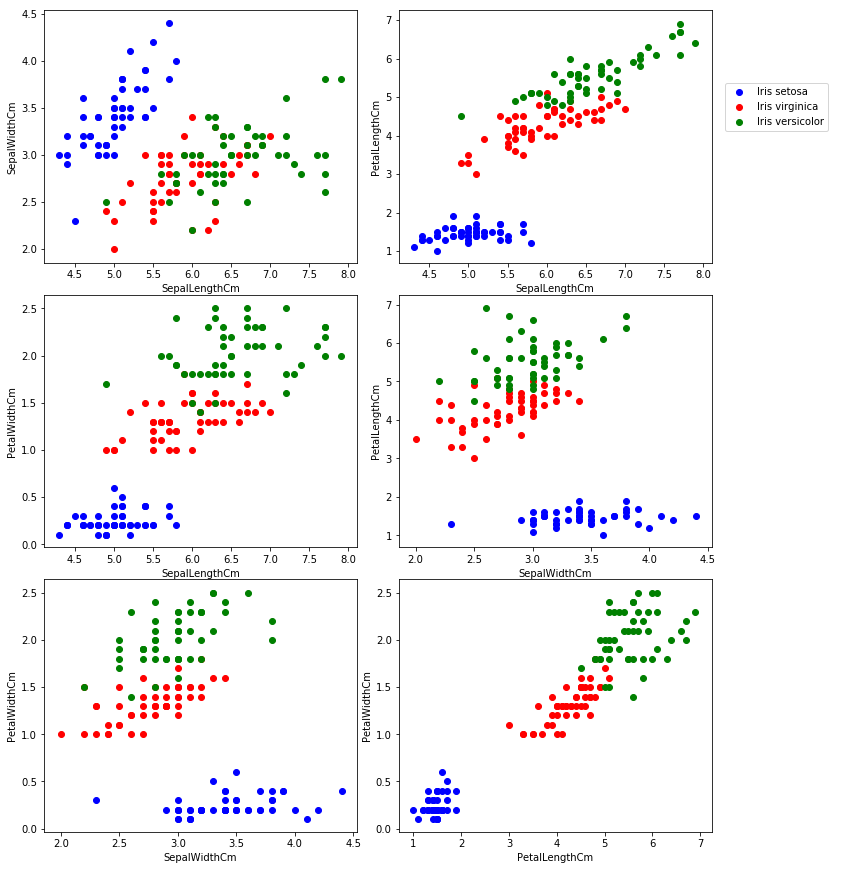

In [3]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10,12))
fig.tight_layout()

plots = [(0,1),(0,2),(0,3),(1,2),(1,3),(2,3)]
colors = ['b', 'r', 'g']
labels = ['Iris setosa','Iris virginica','Iris versicolor']

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        ax.scatter(df[df['Species']==j][x], df[df['Species']==j][y], color=colors[j])
    ax.set(xlabel=x, ylabel=y)

fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))
plt.show()

### Step 3: Create the Model

In [4]:
class ANNModel(nn.Module):
    def __init__(self, in_features=4, h1=6, h2=4, out_features=3):
        super().__init__()
        self.layer1 = nn.Linear(in_features,h1)
        self.layer2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)
        
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = self.out(x)
        return x

In [5]:
torch.manual_seed(RAND_SEED)
model = ANNModel()

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

### Step 4: Train the Model

In [6]:
X = df.drop('Species',axis=1).values
y = df['Species'].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=RAND_SEED)

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [7]:
epochs = 400
losses = []

for i in range(epochs):
    i+=1
    y_pred = model.forward(X_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss)
    
    if i % 10 == 0:
        print(f'epoch: {i:2}  loss: {loss.item():10.8f}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch: 10  loss: 0.94572610
epoch: 20  loss: 0.78106773
epoch: 30  loss: 0.65191805
epoch: 40  loss: 0.58967179
epoch: 50  loss: 0.53553009
epoch: 60  loss: 0.46455780
epoch: 70  loss: 0.37588936
epoch: 80  loss: 0.28772929
epoch: 90  loss: 0.21598868
epoch: 100  loss: 0.16665573
epoch: 110  loss: 0.13617992
epoch: 120  loss: 0.11738266
epoch: 130  loss: 0.10498451
epoch: 140  loss: 0.09623085
epoch: 150  loss: 0.08965312
epoch: 160  loss: 0.08447020
epoch: 170  loss: 0.08024461
epoch: 180  loss: 0.07671003
epoch: 190  loss: 0.07369307
epoch: 200  loss: 0.07107443
epoch: 210  loss: 0.06877114
epoch: 220  loss: 0.06672323
epoch: 230  loss: 0.06488367
epoch: 240  loss: 0.06321963
epoch: 250  loss: 0.06170355
epoch: 260  loss: 0.06031372
epoch: 270  loss: 0.05903307
epoch: 280  loss: 0.05784832
epoch: 290  loss: 0.05674851
epoch: 300  loss: 0.05572284
epoch: 310  loss: 0.05476466
epoch: 320  loss: 0.05386619
epoch: 330  loss: 0.05302281
epoch: 340  loss: 0.05223004
epoch: 350  loss: 0.051

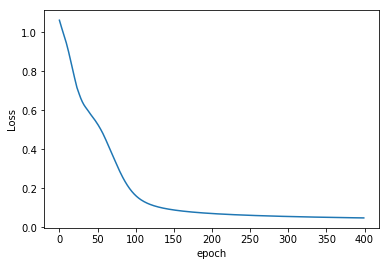

In [8]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch');

In [9]:
with torch.no_grad():
    y_val = model.forward(X_test)
    loss = criterion(y_val, y_test)
print(f'{loss:.8f}')

0.07455315


In [10]:
correct = 0
y_pred = []
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_val = model.forward(data)
        y_pred.append(y_val)
        is_correct = False
        if y_val.argmax().item() == y_test[i]:
            correct += 1
            is_correct = True
        print(f'{i+1:2}. {str(y_val):38}  {y_test[i]}  {"Correct" if is_correct else "Wrong"}')
        
print(f'\n{correct} out of {len(y_test)} = {100*correct/len(y_test):.2f}% correct')

for i in range(len(y_pred)): y_pred[i] = torch.argmax(y_pred[i])

 1. tensor([ 2.1766, -2.3376, -2.0337])     0  Correct
 2. tensor([-5.2627,  5.5110, -2.2547])     1  Correct
 3. tensor([-3.2879,  3.4276, -2.1961])     1  Correct
 4. tensor([ 2.1766, -2.3376, -2.0337])     0  Correct
 5. tensor([-19.9216,   3.5281,  14.2420])  2  Correct
 6. tensor([ 2.1766, -2.3376, -2.0337])     0  Correct
 7. tensor([-10.1685,   3.0955,   4.9661])  2  Correct
 8. tensor([-17.5422,   1.9239,  13.4333])  2  Correct
 9. tensor([ 2.1766, -2.3376, -2.0337])     0  Correct
10. tensor([-17.9045,   2.0999,  13.6227])  2  Correct
11. tensor([-7.4355,  7.3659, -1.8948])     1  Correct
12. tensor([-5.5442,  5.8080, -2.2631])     1  Correct
13. tensor([ 2.1766, -2.3376, -2.0337])     0  Correct
14. tensor([-15.8929,   3.3322,  10.4271])  2  Correct
15. tensor([-20.0506,   2.6216,  15.2499])  2  Correct
16. tensor([-5.0851,  5.3236, -2.2495])     1  Correct
17. tensor([-8.2844,  5.8200,  0.4493])     1  Correct
18. tensor([-7.5085,  5.4307,  0.0557])     1  Correct
19. tensor

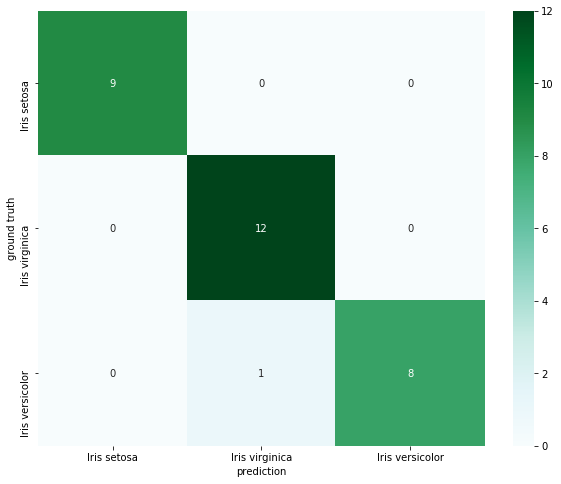

In [11]:
arr = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(arr, labels, labels)
plt.figure(figsize = (10,8))
sn.heatmap(df_cm, annot=True, fmt="d", cmap='BuGn')
plt.xlabel("prediction")
plt.ylabel("ground truth")
plt.show()